# [1] 単純なニューラルネットワークモデルで隠れニューロンの数と学習率を実験してみてください。
※ ここではGoogle Colaraboratoryでの実行を想定しています。

※ Google Colaraboratoryでbashコマンドを実行するには、命令の前に!をつけます。

In [3]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from collections import OrderedDict
import numpy as np

In [4]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

In [12]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 4,  1, 10,  3,  0,  6,  9,  7,  2]), tensor([8, 5]))

In [17]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

### （a）モデルからより線形な出力を得るにはどのような変更を行うといいのか確認してください。

In [ ]:
# 回答

In [40]:
hidden_num = 50

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_num)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_num, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=50, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=50, out_features=1, bias=True)
)

In [41]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f'Epoch: {epoch}, Training loss: {loss_train.item():.4f}, Validation loss: {loss_val.item():.4f}')

In [45]:
optimizer = optim.SGD(seq_model.parameters(), lr=2*1e-3)

In [46]:
training_loop(
    n_epochs=50000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val
)

Epoch: 1, Training loss: 1.9074, Validation loss: 1.9771
Epoch: 1000, Training loss: 3.5201, Validation loss: 6.2550
Epoch: 2000, Training loss: 2.2918, Validation loss: 3.4619
Epoch: 3000, Training loss: 2.0058, Validation loss: 2.6817
Epoch: 4000, Training loss: 1.9327, Validation loss: 2.3963
Epoch: 5000, Training loss: 1.9067, Validation loss: 2.2417
Epoch: 6000, Training loss: 1.8950, Validation loss: 2.1227
Epoch: 7000, Training loss: 1.8919, Validation loss: 2.0452
Epoch: 8000, Training loss: 1.8916, Validation loss: 2.0347
Epoch: 9000, Training loss: 1.8914, Validation loss: 2.0370
Epoch: 10000, Training loss: 1.8912, Validation loss: 2.0393
Epoch: 11000, Training loss: 1.8909, Validation loss: 2.0416
Epoch: 12000, Training loss: 1.8907, Validation loss: 2.0438
Epoch: 13000, Training loss: 1.8905, Validation loss: 2.0458
Epoch: 14000, Training loss: 1.8903, Validation loss: 2.0476
Epoch: 15000, Training loss: 1.8901, Validation loss: 2.0492
Epoch: 16000, Training loss: 1.8899, 

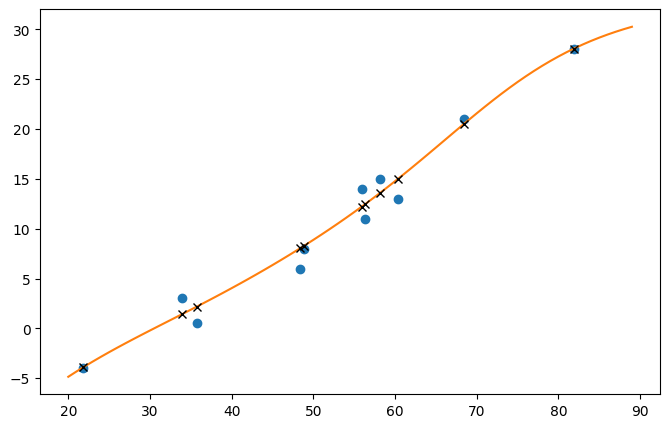

In [47]:
import matplotlib.pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(figsize=[8, 5])
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy())
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

### （b）モデルを明らかな過学習の状態にしてみてください


In [ ]:
# 回答


# [2] 物理学で重要な問題は科学的発見成果を祝う際の適切なワインを見つけることです。第4章で使用したワインのデータを読み込み、適切な数の入力パラメータで新しいモデルを作成します。

### （a）これまで使ってきた温度データと比較して、訓練にどれくらいの時間がかかるのか試してください

In [ ]:
# 回答

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
%cd /content/drive/MyDrive/MyStudy/dlwpt-code-ja/p1ch6

/content/drive/MyDrive/MyStudy/dlwpt-code-ja/p1ch6


In [56]:
%pwd

'/content/drive/MyDrive/MyStudy/dlwpt-code-ja/p1ch6'

In [57]:
import csv

wine_path = '../data/p1ch4/tabular-wine/winequality-white.csv'
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=';', skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [59]:
wineq_numpy.shape

(4898, 12)

In [60]:
wineq = torch.from_numpy(wineq_numpy).to_
wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [61]:
data = wineq[:, :-1]
target = wineq[:, -1]

print('学習データ', data.shape)
print('正解ラベル', target.shape)

学習データ torch.Size([4898, 11])
正解ラベル torch.Size([4898])


In [62]:
n_samples = data.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

In [70]:
data_train = data[train_indices]
data_val = data[val_indices].unsqueeze(1)

target_train = target[train_indices]
target_val = target[val_indices].unsqueeze(1)

In [66]:
from collections import OrderedDict

hidden_num = 200

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(11, hidden_num)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_num, 1))
]))

In [74]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch <= 5 or epoch % 1000 == 0:
            print(f'Epoch: {epoch}, Training loss: {loss_train.item():.4f}, Validation loss: {loss_val.item():.4f}')

In [72]:
import torch.optim as optim
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

In [75]:
training_loop(
    n_epochs=50000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=data_train,
    t_u_val=data_val,
    t_c_train=target_train,
    t_c_val=target_val
)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([3919])) that is different to the input size (torch.Size([3919, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([979, 1])) that is different to the input size (torch.Size([979, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1, Training loss: 0.8114, Validation loss: 0.7352
Epoch: 2, Training loss: 0.8114, Validation loss: 0.7352
Epoch: 3, Training loss: 0.8113, Validation loss: 0.7352
Epoch: 4, Training loss: 0.8113, Validation loss: 0.7351
Epoch: 5, Training loss: 0.8113, Validation loss: 0.7351


KeyboardInterrupt: ignored

### （b）訓練時間に差が出た理由はなぜでしょうか？

In [ ]:
# 回答

### （c）このデータセットの訓練中に損失を減少させることができることを確認してください

In [ ]:
# 回答

### （d）このデータセットをグラフ化する方法を確認してください

In [ ]:
# 回答